# Solar Power Data Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# lets read the dataset
data = pd.read_csv("Nise_solar_data.csv")

In [ ]:
data.head()

,Timestamp,Air Temp (degC),Wind Speed (cm/s),Panel Temp (degC),Array Voltage (V),Array Current (A),Solar Radiation (W/m2),Power (W)
0,00:00.0,16.335964,124.64684,25.119460,2.640770,5.399288,0.082,296.133333
1,05:00.0,16.289640,85.642344,25.043114,2.645897,5.399017,0.099,245.850000
2,10:00.0,16.285664,65.216872,25.030530,2.660332,5.398926,0.150,291.700000
3,15:00.0,16.281720,122.53746,25.096418,2.148491,5.399197,0.212,190.483333
4,20:00.0,16.244652,105.88936,25.060858,2.066124,5.399017,0.267,274.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1561 non-null   object 
 1   Air Temp (degC)         1561 non-null   float64
 2   Wind Speed (cm/s)       1561 non-null   object 
 3   Panel Temp (degC)       1561 non-null   float64
 4   Array Voltage (V)       1561 non-null   float64
 5   Array Current (A)       1561 non-null   float64
 6   Solar Radiation (W/m2)  1561 non-null   float64
 7   Power (W)               1561 non-null   float64
dtypes: float64(6), object(2)
memory usage: 97.8+ KB


# Exploratory Data Analysis

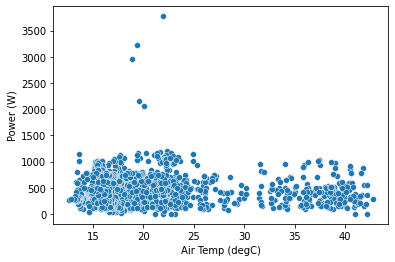

In [ ]:
sns.scatterplot(data=data, x="Air Temp (degC)", y="Power (W)")

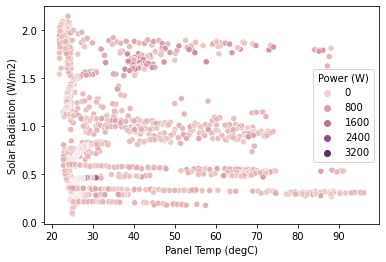

In [ ]:
sns.scatterplot(data=data, x="Panel Temp (degC)", y="Solar Radiation (W/m2)", hue="Power (W)")

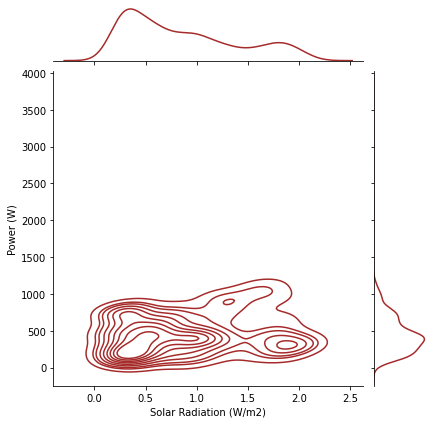

In [ ]:
sns.jointplot(x='Solar Radiation (W/m2)',y='Power (W)',data = data, kind = 'kde' ,color = 'brown')

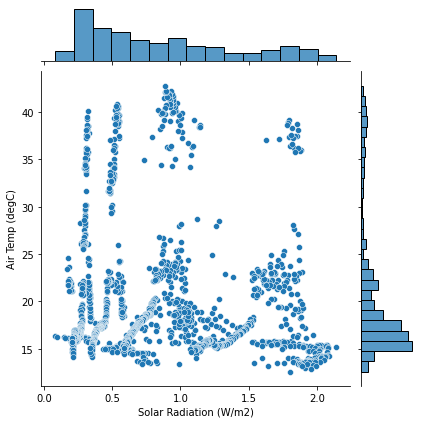

In [ ]:
sns.jointplot(x='Solar Radiation (W/m2)',y='Air Temp (degC)',data = data)

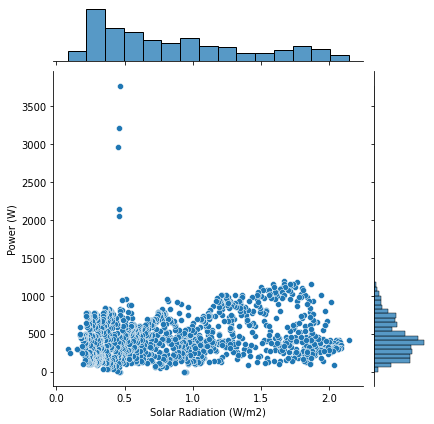

In [ ]:
sns.jointplot(x='Solar Radiation (W/m2)',y='Power (W)',data = data)

In [ ]:
# sns.pairplot(data, hue= 'Power_Generated')

In [ ]:
# Removing the two columns which is not in need
waste1 = data.pop("Timestamp")
# waste2 = data.pop("Wind Speed (cm/s)")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air Temp (degC)         1561 non-null   float64
 1   Wind Speed (cm/s)       1561 non-null   object 
 2   Panel Temp (degC)       1561 non-null   float64
 3   Array Voltage (V)       1561 non-null   float64
 4   Array Current (A)       1561 non-null   float64
 5   Solar Radiation (W/m2)  1561 non-null   float64
 6   Power (W)               1561 non-null   float64
dtypes: float64(6), object(1)
memory usage: 85.6+ KB


In [ ]:
data.head(4)

,Air Temp (degC),Wind Speed (cm/s),Panel Temp (degC),Array Voltage (V),Array Current (A),Solar Radiation (W/m2),Power (W)
0,16.335964,124.64684,25.119460,2.640770,5.399288,0.082,296.133333
1,16.289640,85.642344,25.043114,2.645897,5.399017,0.099,245.850000
2,16.285664,65.216872,25.030530,2.660332,5.398926,0.150,291.700000
3,16.281720,122.53746,25.096418,2.148491,5.399197,0.212,190.483333


In [ ]:
data.describe()

,Air Temp (degC),Panel Temp (degC),Array Voltage (V),Array Current (A),Solar Radiation (W/m2),Power (W)
count,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000
mean,20.592193,37.134946,35.309061,5.392389,0.855903,454.114260
std,7.255375,17.916033,30.911454,0.010195,0.546929,280.988537
min,12.603184,21.924614,1.483992,5.369065,0.082000,0.000000
25%,15.864284,24.841270,2.190518,5.384840,0.375500,261.416667
50%,17.559780,27.049252,51.595404,5.397202,0.710620,409.100000
75%,22.166158,44.452716,56.147356,5.400489,1.214200,608.700000
max,42.781088,96.081104,89.599624,5.404922,2.142000,3773.200000


## Checking for the String cell in columns One by one
Because Model only takes numeric values
link for some commands = https://www.statology.org/pandas-check-if-column-contains-string/ 

In [ ]:
(data['Wind Speed (cm/s)'].eq('OverRange')).any()

True

In [ ]:
(data['Power (W)'].eq('OverRange')).any()

False

## Checking again if any string present in columns

In [ ]:
data['Air Temp (degC)'].count()

1561

In [ ]:
(data['Air Temp (degC)'].eq('exact_string')).any()

False

In [ ]:
(data['Power (W)'].eq('exact_string')).any()

False

## Now Removing the String values from columns


In [ ]:
# The following code shows how to count the number of times the partial string 'OverRange' occurs in the conference column of the DataFrame:
(data['Wind Speed (cm/s)'].eq('OverRange')).sum()

1

In [ ]:
(data['Wind Speed (cm/s)'].eq('OverRange')).index

RangeIndex(start=0, stop=1563, step=1)

## Now we will drop the String cells from data

---


link for this - https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/

In [ ]:
main_data = data[data['Wind Speed (cm/s)'].str.contains('OverRange')==False]

In [ ]:
(main_data['Wind Speed (cm/s)'].eq('OverRange')).any()

False

In [ ]:
# Now we will work with Main data

In [ ]:
main_data.head()

,Air Temp (degC),Wind Speed (cm/s),Panel Temp (degC),Array Voltage (V),Array Current (A),Solar Radiation (W/m2),Power (W)
0,16.335964,124.64684,25.119460,2.640770,5.399288,0.082,296.133333
1,16.289640,85.642344,25.043114,2.645897,5.399017,0.099,245.850000
2,16.285664,65.216872,25.030530,2.660332,5.398926,0.150,291.700000
3,16.281720,122.53746,25.096418,2.148491,5.399197,0.212,190.483333
4,16.244652,105.88936,25.060858,2.066124,5.399017,0.267,274.800000


## Min Max Declaration

In [ ]:
min_d = main_data['Power (W)'].min()
max_d= main_data['Power (W)'].max()

In [ ]:
main_data["Power (W)"].describe()

count    1560.000000
mean      454.086712
std       281.076532
min         0.000000
25%       261.329167
50%       409.058333
75%       608.833333
max      3773.200000
Name: Power (W), dtype: float64

In [ ]:
main_data.describe()

,Air Temp (degC),Panel Temp (degC),Array Voltage (V),Array Current (A),Solar Radiation (W/m2),Power (W)
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,20.579947,37.100720,35.280143,5.392403,0.856112,454.086712
std,7.241547,17.870657,30.900237,0.010184,0.547043,281.076532
min,12.603184,21.924614,1.483992,5.369065,0.082000,0.000000
25%,15.863570,24.840454,2.189533,5.384925,0.375457,261.329167
50%,17.553780,27.048828,51.595314,5.397225,0.710785,409.058333
75%,22.165889,44.446407,56.084893,5.400489,1.214300,608.833333
max,42.781088,96.081104,89.599624,5.404922,2.142000,3773.200000


In [ ]:
min_d

0.0

In [ ]:
max_d

3773.2

In [ ]:
copyof_main_data = main_data

# Normalizing the values

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

numericals = ['Air Temp (degC)','Wind Speed (cm/s)','Panel Temp (degC)','Array Voltage (V)','Array Current (A)','Solar Radiation (W/m2)','Power (W)']

main_data[numericals] = scaler.fit_transform(main_data[numericals])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
main_data.head(100)

,Air Temp (degC),Wind Speed (cm/s),Panel Temp (degC),Array Voltage (V),Array Current (A),Solar Radiation (W/m2),Power (W)
0,0.123692,0.322073,0.043082,0.013128,0.842876,0.000000,0.078483
1,0.122157,0.219699,0.042053,0.013186,0.835318,0.008252,0.065157
2,0.122026,0.166088,0.041883,0.013350,0.832780,0.033010,0.077308
3,0.121895,0.316537,0.042772,0.007541,0.840338,0.063107,0.050483
4,0.120667,0.272841,0.042292,0.006606,0.835318,0.089806,0.072829
...,...,...,...,...,...,...,...
95,0.158132,0.231149,0.148051,0.606026,0.922777,0.439218,0.127646
96,0.154948,0.100245,0.122813,0.598623,0.902362,0.424665,0.120662
97,0.137817,0.272844,0.150304,0.611844,0.877179,0.413592,0.117089
98,0.124816,0.191123,0.152381,0.618948,0.879717,0.447864,0.117138


In [ ]:
main_data.tail(10)

,Air Temp (degC),Wind Speed (cm/s),Panel Temp (degC),Array Voltage (V),Array Current (A),Solar Radiation (W/m2),Power (W)
1551,0.301738,0.855358,0.373280,0.658618,0.424966,0.050087,0.126802
1552,0.311472,0.629668,0.405147,0.688729,0.439942,0.050044,0.127646
1553,0.366986,0.555359,0.451403,0.706676,0.348802,0.048752,0.120662
1554,0.312981,0.476314,0.387185,0.668887,0.354910,0.048267,0.117089
1555,0.305906,0.955571,0.401988,0.703729,0.342332,0.047422,0.117138
1556,0.317843,0.589989,0.349752,0.656362,0.328527,0.045631,0.154961
1557,0.304389,0.704017,0.311312,0.649344,0.358758,0.045403,0.128251
1558,0.304166,0.034745,0.352099,0.666106,0.346153,0.044714,0.128233
1559,0.397444,0.681415,0.416670,0.710525,0.287392,0.044519,0.128507
1560,0.357258,0.778724,0.480587,0.735798,0.272443,0.043214,0.130402


In [ ]:
main_data.shape

(1560, 7)

In [ ]:
main_data.describe()

,Air Temp (degC),Wind Speed (cm/s),Panel Temp (degC),Array Voltage (V),Array Current (A),Solar Radiation (W/m2),Power (W)
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,0.264325,0.533524,0.204650,0.383543,0.650852,0.375782,0.120345
std,0.239962,0.235034,0.240986,0.350678,0.284029,0.265555,0.074493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.108039,0.323416,0.039320,0.008007,0.442326,0.142455,0.069259
50%,0.164047,0.575917,0.069100,0.568700,0.785342,0.305235,0.108412
75%,0.316878,0.697981,0.303706,0.619651,0.876370,0.549660,0.161357
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1560
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air Temp (degC)         1560 non-null   float64
 1   Wind Speed (cm/s)       1560 non-null   float64
 2   Panel Temp (degC)       1560 non-null   float64
 3   Array Voltage (V)       1560 non-null   float64
 4   Array Current (A)       1560 non-null   float64
 5   Solar Radiation (W/m2)  1560 non-null   float64
 6   Power (W)               1560 non-null   float64
dtypes: float64(7)
memory usage: 97.5 KB


In [ ]:
Y = main_data.pop('Power (W)')

X = main_data

In [ ]:
X.dtypes

Air Temp (degC)           float64
Wind Speed (cm/s)         float64
Panel Temp (degC)         float64
Array Voltage (V)         float64
Array Current (A)         float64
Solar Radiation (W/m2)    float64
dtype: object

## Spliting the data into train and test 

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((1248, 6), (312, 6), (1248,), (312,))

# Main Model 1 (FFNN)
This is normal FeedForward Neural Network

In [ ]:
%%time

import tensorflow as tf
import random

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([tf.keras.layers.Dense(50,activation='relu'),
                               tf.keras.layers.Dense(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["mae"])



history_1 = model_1.fit(X_train,Y_train, epochs=20)

Epoch 1/20
39/39 [==============================] - 2s 3ms/step - loss: 0.1851 - mae: 0.1851
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0567 - mae: 0.0567
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0540 - mae: 0.0540
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0530 - mae: 0.0530
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0529 - mae: 0.0529
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0524 - mae: 0.0524
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0522 - mae: 0.0522
Epoch 8/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0521 - mae: 0.0521
Epoch 9/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0518 - mae: 0.0518
Epoch 10/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0518 - mae: 0.0518
Epoch 11/20
39/39 [==============================] - 0s 4ms/step - lo

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 50)                  350       
                                                                 
 dense_1 (Dense)             (32, 10)                  510       
                                                                 
 dense_2 (Dense)             (32, 1)                   11        
                                                                 
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Neural Network Error')

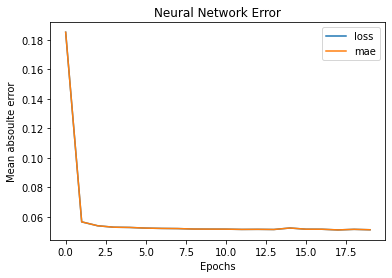

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("Mean absoulte error")
plt.xlabel("Epochs")
plt.title("Neural Network Error")

In [ ]:
model_1.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0474 - mae: 0.0474


[0.04737408459186554, 0.04737408459186554]

In [ ]:
y_pred_1 = model_1.predict(X_test)

In [ ]:
Y_test

161     0.104602
1044    0.140190
959     0.146835
439     0.230384
1218    0.109721
          ...   
948     0.057824
469     0.154294
974     0.114747
552     0.096046
92      0.064026
Name: Power (W), Length: 312, dtype: float64

In [ ]:
y_pred_1

array([[0.10320203],
       [0.1063896 ],
       [0.11015795],
       [0.11488287],
       [0.08641387],
       [0.15612799],
       [0.12295628],
       [0.09688633],
       [0.1283001 ],
       [0.10485976],
       [0.09947985],
       [0.11924751],
       [0.12774478],
       [0.09058746],
       [0.14097695],
       [0.09093162],
       [0.16062585],
       [0.09981561],
       [0.15159976],
       [0.08946551],
       [0.12717287],
       [0.13351117],
       [0.13943037],
       [0.07677913],
       [0.1031938 ],
       [0.08836553],
       [0.09440041],
       [0.11810273],
       [0.1535745 ],
       [0.09646785],
       [0.0918486 ],
       [0.10408154],
       [0.11685991],
       [0.11816925],
       [0.11477597],
       [0.10599488],
       [0.11532508],
       [0.13982546],
       [0.12147331],
       [0.08763394],
       [0.11226328],
       [0.11558366],
       [0.08695489],
       [0.13020799],
       [0.10463955],
       [0.09740646],
       [0.09386177],
       [0.107

In [ ]:
final_power_1 = y_pred_1 * (max_d - min_d) + min_d

In [ ]:
final_power_1

array([[389.4019 ],
       [401.42923],
       [415.64798],
       [433.47604],
       [326.0568 ],
       [589.1021 ],
       [463.93863],
       [365.5715 ],
       [484.10193],
       [395.65686],
       [375.3574 ],
       [449.9447 ],
       [482.0066 ],
       [341.8046 ],
       [531.9342 ],
       [343.1032 ],
       [606.0734 ],
       [376.62427],
       [572.01624],
       [337.57126],
       [479.84866],
       [503.76434],
       [526.0987 ],
       [289.703  ],
       [389.37085],
       [333.4208 ],
       [356.19162],
       [445.6252 ],
       [579.4673 ],
       [363.99246],
       [346.5631 ],
       [392.72046],
       [440.93582],
       [445.8762 ],
       [433.0727 ],
       [399.93988],
       [435.1446 ],
       [527.5894 ],
       [458.3431 ],
       [330.66037],
       [423.5918 ],
       [436.12024],
       [328.0982 ],
       [491.30075],
       [394.82593],
       [367.53406],
       [354.1592 ],
       [404.73047],
       [424.82986],
       [408.807  ],


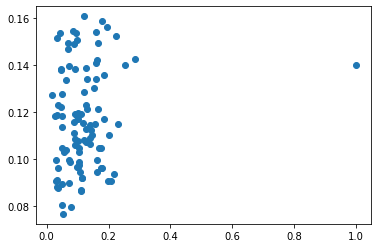

In [ ]:
plt.scatter(Y_test[:100], y_pred_1[:100])

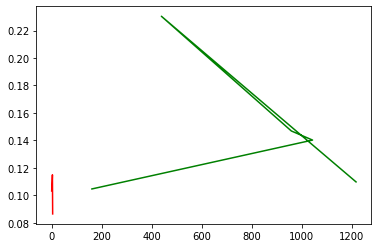

In [ ]:
plt.plot(Y_test[:5],'g', y_pred_1[:5],'r')

# Main Model 2 (FFNN with dropout layers)

In [ ]:
%%time
import tensorflow as tf
import random

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([tf.keras.layers.Dense(200,activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["mae"])



history_2 = model_2.fit(X_train,Y_train, epochs=20)

Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.0682 - mae: 0.0682
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0564 - mae: 0.0564
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0556 - mae: 0.0556
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0549 - mae: 0.0549
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0549 - mae: 0.0549
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0540 - mae: 0.0540
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0543 - mae: 0.0543
Epoch 8/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0535 - mae: 0.0535
Epoch 9/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0527 - mae: 0.0527
Epoch 10/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0523 - mae: 0.0523
Epoch 11/20
39/39 [==============================] - 0s 4ms/step - lo

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (32, 200)                 1400      
                                                                 
 dropout (Dropout)           (32, 200)                 0         
                                                                 
 dense_4 (Dense)             (32, 100)                 20100     
                                                                 
 dropout_1 (Dropout)         (32, 100)                 0         
                                                                 
 dense_5 (Dense)             (32, 10)                  1010      
                                                                 
 dense_6 (Dense)             (32, 1)                   11        
                                                                 
Total params: 22,521
Trainable params: 22,521
Non-trai

In [ ]:
model_2.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0469 - mae: 0.0469


[0.04689249023795128, 0.04689249023795128]

In [ ]:
y_pred_2 = model_2.predict(X_test)

In [ ]:
y_pred_2[:7]

array([[0.11316951],
       [0.11822991],
       [0.10987912],
       [0.14073695],
       [0.08783047],
       [0.1923679 ],
       [0.1269728 ]], dtype=float32)

In [ ]:
final_power_2 = y_pred_2 * (max_d - min_d) + min_d

In [ ]:
final_power_2[:10]

array([[427.01117],
       [446.1051 ],
       [414.5959 ],
       [531.0287 ],
       [331.40192],
       [725.8425 ],
       [479.09375],
       [332.60648],
       [437.6687 ],
       [379.90823]], dtype=float32)

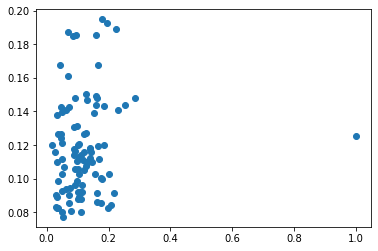

In [ ]:
plt.scatter(Y_test[:100], y_pred_2[:100])

CPU times: user 38.5 ms, sys: 31 µs, total: 38.5 ms
Wall time: 43.3 ms


Text(0.5, 1.0, 'NN with Dropout layers-Error')

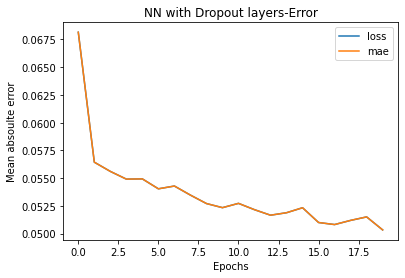

In [ ]:
%%time

pd.DataFrame(history_2.history).plot()
plt.ylabel("Mean absoulte error")
plt.xlabel("Epochs")
plt.title("NN with Dropout layers-Error")

# Model 3 (LSTM)

In [ ]:
# LSTM RNN
%%time

import tensorflow as tf

tf.random.set_seed(42)
 
model_3 = tf.keras.Sequential([tf.keras.layers.LSTM(100,activation='relu',return_sequences=True,input_shape=(6, 1),dropout=0.3),
                               tf.keras.layers.LSTM(50,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = 'mae',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

history_3 = model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=9)

Epoch 1/9
39/39 [==============================] - 4s 12ms/step - loss: 0.0592 - mae: 0.0592
Epoch 2/9
39/39 [==============================] - 0s 12ms/step - loss: 0.0551 - mae: 0.0551
Epoch 3/9
39/39 [==============================] - 0s 12ms/step - loss: 0.0558 - mae: 0.0558
Epoch 4/9
39/39 [==============================] - 0s 11ms/step - loss: 0.0552 - mae: 0.0552
Epoch 5/9
39/39 [==============================] - 0s 12ms/step - loss: 0.0549 - mae: 0.0549
Epoch 6/9
39/39 [==============================] - 0s 12ms/step - loss: 0.0552 - mae: 0.0552
Epoch 7/9
39/39 [==============================] - 0s 12ms/step - loss: 0.0557 - mae: 0.0557
Epoch 8/9
39/39 [==============================] - 0s 12ms/step - loss: 0.0553 - mae: 0.0553
Epoch 9/9
39/39 [==============================] - 0s 12ms/step - loss: 0.0552 - mae: 0.0552
CPU times: user 7.63 s, sys: 500 ms, total: 8.13 s
Wall time: 7.88 s


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time

model_3.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.0468 - mae: 0.0468
CPU times: user 405 ms, sys: 17.6 ms, total: 422 ms
Wall time: 419 ms


[0.046815481036901474, 0.046815477311611176]

CPU times: user 29.5 ms, sys: 2.76 ms, total: 32.2 ms
Wall time: 32 ms


Text(0.5, 1.0, 'LSTM Error')

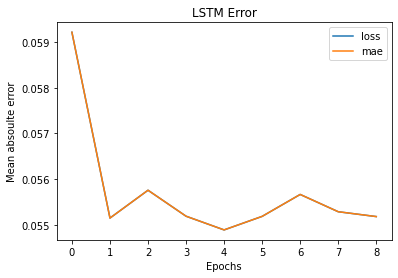

In [ ]:
%%time

pd.DataFrame(history_3.history).plot()
plt.ylabel("Mean absoulte error")
plt.xlabel("Epochs")
plt.title("LSTM Error")

In [ ]:
y_pred_3 = model_3.predict(X_test)

In [ ]:
final_power_3 = y_pred_3 * (max_d - min_d) + min_d

In [ ]:
final_power_3[:10]

array([[383.0489 ],
       [384.73642],
       [384.0166 ],
       [383.70358],
       [382.69992],
       [384.40213],
       [384.07794],
       [385.97778],
       [384.11194],
       [384.2452 ]], dtype=float32)

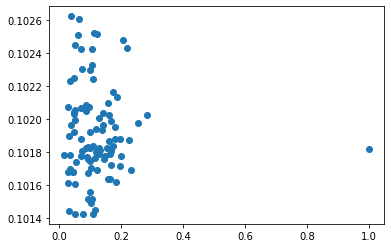

In [ ]:
plt.scatter(Y_test[:100], y_pred_3[:100])

In [ ]:
X_train.shape

(1248, 6)

# Main Model 4 (RNN)

In [ ]:
# Simle RNN (Recurrent Neural network)

%%time
import tensorflow as tf
import random

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.SimpleRNN(300,activation='tanh',return_sequences=True,input_shape=(6,1)),
                               tf.keras.layers.Dropout(0.2,seed=42),
                               tf.keras.layers.SimpleRNN(200,activation='tanh'),
                               tf.keras.layers.Dropout(0.2,seed=42),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss='mae',
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['mae'])

history_4 = model_4.fit(X_train,Y_train,epochs=30)

Epoch 1/30
39/39 [==============================] - 2s 10ms/step - loss: 0.2016 - mae: 0.2016
Epoch 2/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0806 - mae: 0.0806
Epoch 3/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0748 - mae: 0.0748
Epoch 4/30
39/39 [==============================] - 0s 9ms/step - loss: 0.0700 - mae: 0.0700
Epoch 5/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0707 - mae: 0.0707
Epoch 6/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0710 - mae: 0.0710
Epoch 7/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0694 - mae: 0.0694
Epoch 8/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0663 - mae: 0.0663
Epoch 9/30
39/39 [==============================] - 0s 9ms/step - loss: 0.0646 - mae: 0.0646
Epoch 10/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0635 - mae: 0.0635
Epoch 11/30
39/39 [==============================] - 0s 10ms/

CPU times: user 29.4 ms, sys: 2.02 ms, total: 31.4 ms
Wall time: 30.7 ms


Text(0.5, 1.0, 'RNN Error')

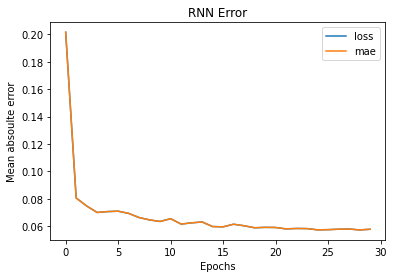

In [ ]:
%%time

pd.DataFrame(history_4.history).plot()
plt.ylabel("Mean absoulte error")
plt.xlabel("Epochs")
plt.title("RNN Error")

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 300)            90600     
                                                                 
 dropout_2 (Dropout)         (None, 6, 300)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200)               100200    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 191,001
Trainable params: 191,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0481 - mae: 0.0481


[0.04807914048433304, 0.04807914048433304]

In [ ]:
y_pred_4 = model_4.predict(Y_test)

In [ ]:
y_pred_4[:10]

array([[0.11232524],
       [0.11338878],
       [0.11358734],
       [0.11608385],
       [0.11247824],
       [0.11505902],
       [0.11297423],
       [0.11220317],
       [0.1127895 ],
       [0.11442654]], dtype=float32)

In [ ]:
final_power_4 = y_pred_4 * (max_d - min_d) + min_d

In [ ]:
final_power_4[:10]

array([[423.8256 ],
       [427.83856],
       [428.58777],
       [438.00757],
       [424.4029 ],
       [434.1407 ],
       [426.27438],
       [423.36502],
       [425.57736],
       [431.7542 ]], dtype=float32)

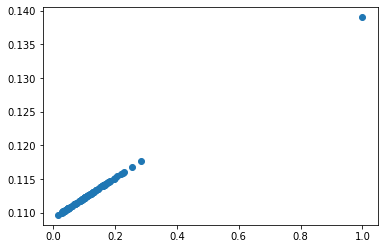

In [ ]:
plt.scatter(Y_test[:100], y_pred_4[:100])

In [ ]:
print('he')

he


# Saving the model

In [ ]:
#model_1.save("NeuralN_try1.h5")

In [ ]:
#model_2.save("ffnndrouput2.h5")

In [ ]:
#model_3.save("lstm.h5")

In [ ]:
#model_4.save("rnn.h5")

# Details of Neural Network
* Model 1(FeedForward NN)-->
  Total layers = 3, activation function = Relu,
  optimizer = Adam(lr=0.001), MAE: 0.047, epochs = 20
* Model 2(FeedForward NN with dropout layers)--> Total layers = 4, activation function = relu, optimizer = Adam(lr=0.001), MAE: 0.0481,epochs = 20,dropout=0.2
* Model 3(LSTM)--> Total layers = 3, activation function = relu,
  optimizer = Adam(lr=0.001), MAE: 0.05034, epochs = 9
* Model 4(simple RNN)--> Total layers = 4, activation function = tanh,
  optimizer = Adam(lr=0.001), MAE: 0.05134, epochs = 30, drouput = 0.2